# Experimenting with Package Functions

IN PROGRESS

## (1) Data generation with MOSFIT

In [ ]:
from survey_agnostic_sn_vae.data_generation.mosfit2 import *
# from ..survey_agnostic_sn_vae.data_generation.objects import *
import os
OUTPUT_PATH = os.getcwd()
print(OUTPUT_PATH)
os.makedirs(OUTPUT_PATH+"/transients", exist_ok=True)

#print(OUTPUT_PATH)
#for f in glob.glob(OUTPUT_PATH+"/transients/*"):
#    os.remove(f) 

gen_single_core(0)


Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
/Users/kdesoto/python_repos/survey-agnostic-sn-vae/data
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit


In [3]:
from survey_agnostic_sn_vae.data_generation.objects import *

OUTPUT_PATH = os.getcwd()

# Now, load Transient object
all_transient_fns = glob.glob(OUTPUT_PATH+"/transients/*")
test_transient = Transient.load(
    all_transient_fns[0],
)
print(test_transient.lightcurves) # should be 2
for lc in test_transient.lightcurves:
    print(lc.bands)
    print(lc.survey.bands)

Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
Switching to MOSFIT path: /Users/kdesoto/python_repos/MOSFiT/mosfit
Switching back to original working directory
[<survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x106073880>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x15798f250>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x1749f0160>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x303416320>, <survey_agnostic_sn_vae.data_generation.objects.LightCurve object at 0x303415030>]
['g' 'i' 'r' 'u' 'y

In [2]:
import os
from survey_agnostic_sn_vae.preprocessing import (
    generate_superraenn_lc_file
)

OUTPUT_PATH = os.getcwd()

transient_dir = os.path.join(
    OUTPUT_PATH,
    "transients"
)
save_dir = os.path.join(
    OUTPUT_PATH,
    "superraenn"
)

os.makedirs(save_dir, exist_ok=True)

generate_superraenn_lc_file(
    transient_dir,
    save_dir
)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100


In [7]:
# overlay multiple LCs for same object 
from survey_agnostic_sn_vae.plotting import plot_lightcurves
from survey_agnostic_sn_vae.data_generation.objects import *

import os

OUTPUT_PATH = os.getcwd()

FILT_LIM_MAGS = np.load(
    os.path.join('/Users/kdesoto/python_repos/survey-agnostic-sn-vae/src/survey_agnostic_sn_vae/data_generation/lim_mags.npz'),
    allow_pickle=True
)['lim_mags'].item() # CHANGE TO WHATEVER HERE

print(FILT_LIM_MAGS['LSST r'])

# Now, load Transient obje dct
all_transient_fns = glob.glob(OUTPUT_PATH+"/transients/*")
test_transient = Transient.load(
    all_transient_fns[3],
)

plot_lightcurves(
    test_transient,
    os.path.join(OUTPUT_PATH, "sample_transient.pdf")
)

24.52
5
3 3
2 2
4 4
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


## Test RAENN encodings

 (1) First try just VAE encodings without similarity loss

In [9]:
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import *
import pretty_errors

OUTDIR = 'superraenn'
LCFILE = 'superraenn/lcs.npz'

device = 'cpu'
batch_size=128

sequence, outseq, loss_mask, ids, maxlen, nfilts = prep_input(LCFILE, save=True, outdir=OUTDIR)
sequence_copy = np.copy(sequence)
outseq_copy = np.copy(outseq)

"""
model = VAE(
    sequence[:,:,:-1].shape,
    hidden_dim=100,
    latent_dim=4,
    device=device
)

model_fn = os.path.join(OUTDIR, "models_contrastive/model_2024-05-13_2_100.pt")
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = 32

model = fit_model(
        model, sequence, outseq, loss_mask,
        n_epochs=1000, device=device,
        batch_size=batch_size, learning_rate=1e-3,
        add_contrastive=False,
        latent_space_plot_dir=None
)
model.save(
    outdir=OUTDIR,
)
dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, ids=ids, outdir=OUTDIR
)
"""
for metric in [
    #"cosine_means",
    #'cosine', 'euclidean', 'euclidean_means',
    #'mahalonobis',
    'wasserstein'
]:
    model_fn = os.path.join(OUTDIR, "models/model_2024-05-17_2_100.pt")
    model = torch.load(model_fn).to(device)
    model.device = device
    model.maxlen = 32
    print(metric)
    model = fit_model(
        model, sequence, outseq, loss_mask,
        n_epochs=500, device=device,
        batch_size=batch_size, learning_rate=1e-3,
        add_contrastive=True, metric=metric, temp=1.0,
        latent_space_plot_dir='figs/latent_space'
    )
    os.makedirs(f'superraenn/contrastive2_{metric}', exist_ok=True)
    model.save(
        outdir=OUTDIR,
        model_dir=f'contrastive2_{metric}',
    )
    dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
    model.save_outputs(
        dataset, ids=ids, outdir=OUTDIR, model_dir=f'contrastive2_{metric}'
    )


True
32
wasserstein
	Epoch 1 	Train Loss:  30.569335039924173 	Val Loss:  28.476799774169923
	Train [15.71513843536377, 2.8635003566741943, 3.3265602588653564] 	Test [19.942970275878906, 2.995962142944336, 3.2251062393188477]
	Epoch 11 	Train Loss:  21.859275256886203 	Val Loss:  26.386400604248045
	Train [17.017911911010742, 2.807142734527588, 3.351069688796997] 	Test [16.644851684570312, 2.845038652420044, 3.245175361633301]
	Epoch 21 	Train Loss:  20.68486157585593 	Val Loss:  26.048786163330078
	Train [17.654499053955078, 2.9470691680908203, 3.1698286533355713] 	Test [16.993013381958008, 2.912320375442505, 3.091888189315796]
	Epoch 31 	Train Loss:  19.894808600930606 	Val Loss:  25.858388137817382
	Train [13.623825073242188, 2.9112844467163086, 3.320403575897217] 	Test [17.365819931030273, 2.8720200061798096, 3.0601630210876465]
	Epoch 41 	Train Loss:  19.45685375438017 	Val Loss:  26.479600524902345
	Train [13.946046829223633, 2.915323257446289, 3.2375664710998535] 	Test [16.57550

In [32]:
from sklearn.model_selection import train_test_split
# compare inter-modal and cross-modal reconstructions for each metric
import torch
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import SNDataset
from survey_agnostic_sn_vae.metrics import *
LCFILE = 'superraenn/lcs.npz'
OUTDIR = 'superraenn'
PREPFILE = 'superraenn/prep.npz'

sequence, outseq, loss_mask, ids, maxlen, nfilts = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)
device = 'cpu'
seq_ids = sequence[:,0,-1]
sequence = sequence[:,:,:-1]

(
    train_seq, test_seq,
    train_out, test_out,
    train_id, test_id,
    train_mask, test_mask
) = train_test_split(
    sequence, outseq,
    seq_ids, loss_mask,
    shuffle=False,
    test_size=0.2
)

dataset = SNDataset(test_seq, test_out, test_id, test_mask, device=device)
train_dataset = SNDataset(train_seq, train_out, train_id, train_mask, device=device)

device='cpu'
for metric in [
    'cosine_means', 'cosine', 'euclidean', 'euclidean_means',
    'mahalonobis', 'wasserstein'
]:
    model_fn = os.path.join(OUTDIR, f"contrastive_{metric}/model_3_100.pt")
    model = torch.load(model_fn).to(device)
    print(metric)
    print(calc_cross_modal_weighted_mse(model, dataset))
    print(calc_inter_modal_weighted_mse(model, dataset))
    print(calc_cross_modal_weighted_mse(model, train_dataset))
    print(calc_inter_modal_weighted_mse(mod el, train_dataset))

32
cosine_means
17.522172927856445
9.278367042541504
17.03622055053711
7.152166843414307
cosine
17.24882698059082
8.542414665222168
16.926658630371094
6.307877063751221
euclidean
13.718243598937988
10.170830726623535
10.283447265625
7.45771598815918
euclidean_means
12.730969429016113
9.293757438659668
10.283709526062012
6.975741386413574
mahalonobis
11.749967575073242
9.811516761779785
9.251144409179688
7.519505977630615
wasserstein
14.82774829864502
11.631543159484863
11.73643684387207
8.480072021484375


True
32
[      1       8       3 ... 4831386 4834496 4837607]
32


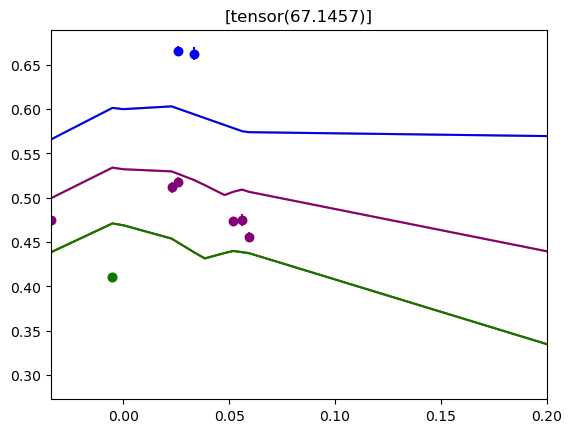

32


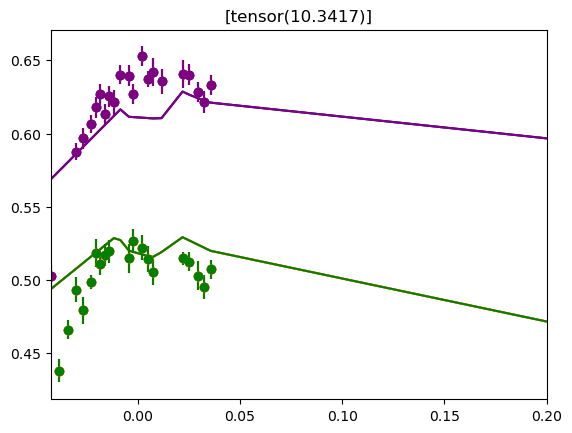

32


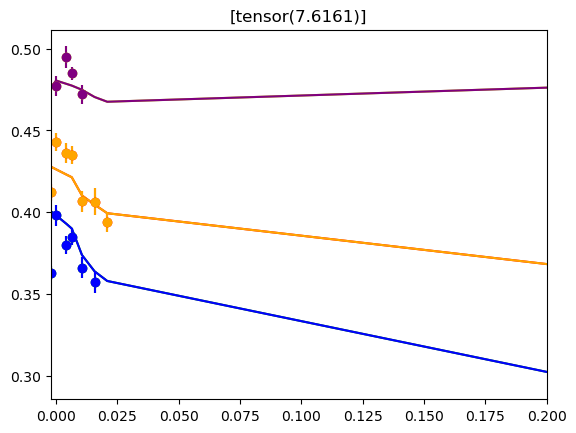

32


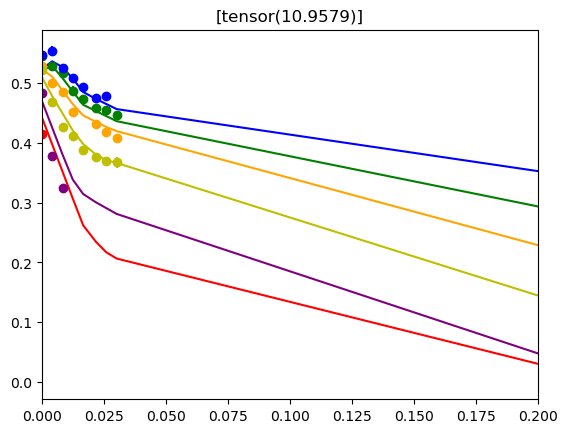

32


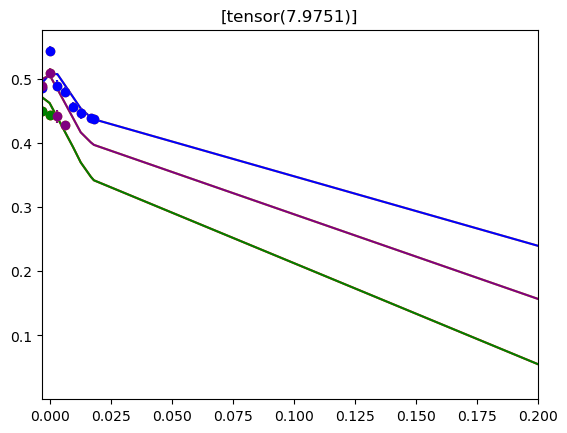

32


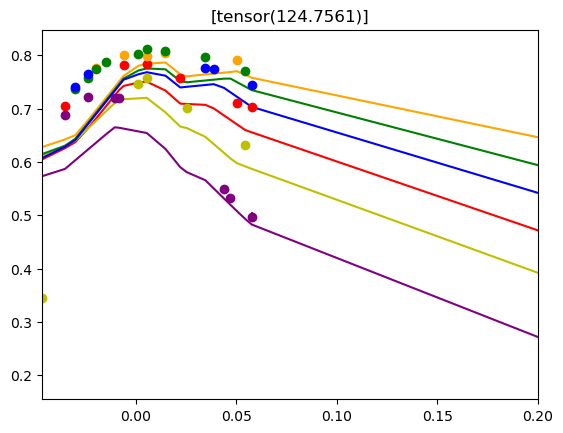

32


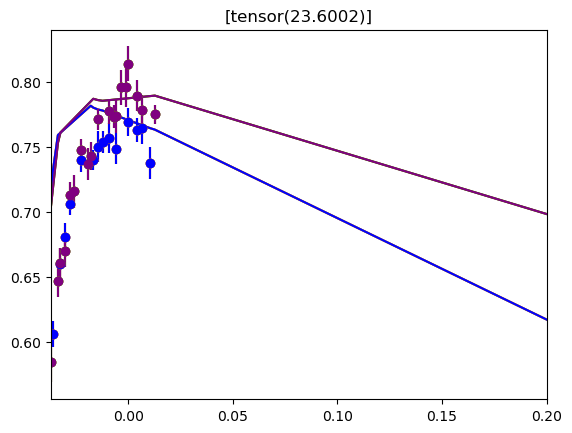

32


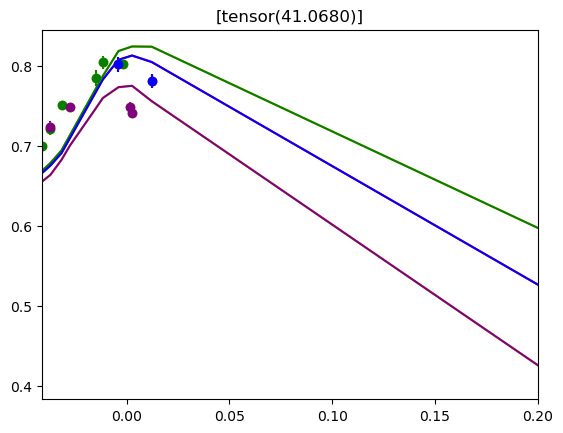

32


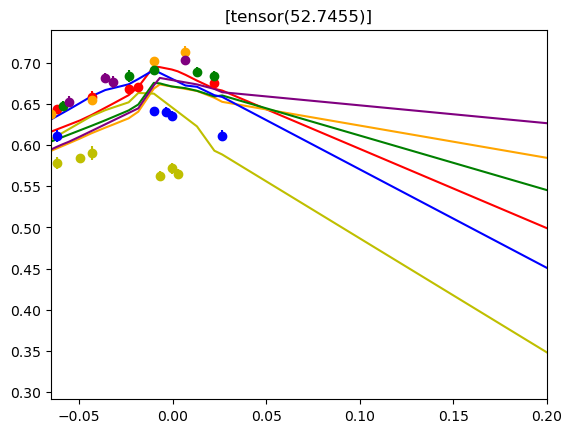

32


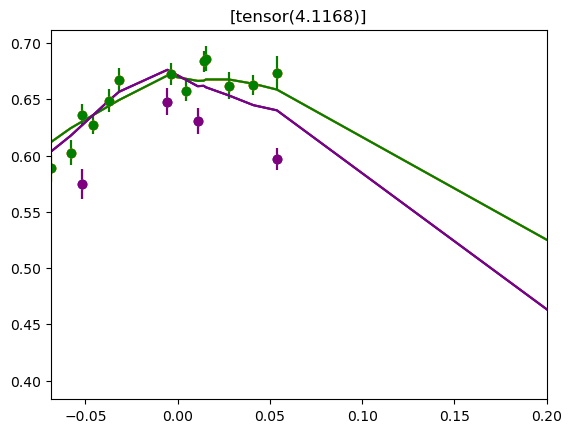

"\n# plot original LC to see where extra point at 0 comes from\nlcs = np.load(LCFILE, allow_pickle=True)['lcs']\nlc = lcs[0]\n\nfor b in range(6):\n    #plt.scatter(lc.times[lc.filters==b], -lc.abs_mags[lc.filters==b], c=colors[b])\n    plt.scatter(lc.dense_times, -lc.dense_lc[:,b,0], c=colors[b])\nplt.show()\n"

In [5]:
# plot decodings
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
import matplotlib.pyplot as plt
import numpy as np
import torch
from survey_agnostic_sn_vae.raenn import *

LCFILE = 'superraenn/lcs.npz'
OUTFILE = 'superraenn/outputs/out.npz'
OUTDIR = 'superraenn'

sequence, outseq, loss_mask, ids, maxlen, nfilts = prep_input(LCFILE, save=True, outdir=OUTDIR)
print(ids)
device = 'cpu'
model_fn = os.path.join(OUTDIR, "contrastive_euclidean/model.pt")
model = torch.load(model_fn).to(device)
model.device = device

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, ids=ids, outdir=OUTDIR
)

out = np.load(OUTFILE, allow_pickle=True)
decodings = out['decodings']
z_means = out['z_means']
z_logvars = out['z_logvars']
ids2 = out['ids']

#assert(len(np.unique(ids)) == len(ids))
#assert(len(np.unique(ids2)) == len(ids2))
#assert np.all(ids == ids2)

for i in range(10):
    dec = decodings[i]
    seq = sequence[i]
    loss_mask_x = loss_mask[i]
    z_mean = z_means[i:i+1]
    z_logvar = z_logvars[i:i+1]
    
    t = seq[:,0]
    print(len(t))
    f = seq[:,1:7]
    ferr = seq[:,7:13]

    colors = ['r','orange','y','g','b','purple']
    for b in range(6):
        mask = loss_mask_x[:,b].astype(bool)
        plt.errorbar(t[~mask], f[:,b][~mask], yerr=ferr[:,b][~mask], fmt='o', c=colors[b])
        plt.plot(t, dec[:,b], c=colors[b])
        
    l = loss_function(
        torch.from_numpy(seq[np.newaxis,:,:]),
        torch.from_numpy(dec[np.newaxis,:,:]),
        torch.from_numpy(loss_mask_x[np.newaxis,:,:]).bool(), 6,
        z_mean, z_logvar, None, None,
    )
    plt.title(l)
    plt.xlim((np.min(t), 0.2))
    plt.show()

"""
# plot original LC to see where extra point at 0 comes from
lcs = np.load(LCFILE, allow_pickle=True)['lcs']
lc = lcs[0]

for b in range(6):
    #plt.scatter(lc.times[lc.filters==b], -lc.abs_mags[lc.filters==b], c=colors[b])
    plt.scatter(lc.dense_times, -lc.dense_lc[:,b,0], c=colors[b])
plt.show()
"""


## Apply model to YSE light curves

In [ ]:
# generate YSE lc file
import os
from survey_agnostic_sn_vae.data_imports.import_yse_dr1 import generate_raenn_file

test_dir = 'yse_dr1_zenodo_snr_geq_4/'
save_dir = 'superraenn/yse/'
os.makedirs(save_dir, exist_ok=True)
generate_raenn_file(test_dir, save_dir)

In [2]:
from survey_agnostic_sn_vae.preprocessing import prep_input
from survey_agnostic_sn_vae.raenn import *

# augment trained models with YSE data
OUTDIR = 'superraenn/yse'
LCFILE = 'superraenn/yse/lcs.npz'
PREPFILE = 'superraenn/prep.npz'

device = 'cpu'
batch_size=128

sequence, outseq, loss_mask, ids, maxlen, nfilts = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)

model_fn = "superraenn/yse/models/model_2024-05-15_4_100.pt"
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = sequence.shape[1]

os.makedirs('figs/yse_latent_space', exist_ok=True)

model = fit_model(
    model, sequence, outseq, loss_mask,
    n_epochs=1000, device=device,
    batch_size=batch_size, learning_rate=1e-3,
    add_contrastive=True,
    latent_space_plot_dir='figs/yse_latent_space'
)
os.makedirs('superraenn/yse/models', exist_ok=True)
model.save(
    outdir=OUTDIR,
    model_dir='models',
)

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, ids=ids, outdir=OUTDIR
)


True
32
	Epoch 1 	Train Loss:  30.573303559247186 	Val Loss:  28.921633148193358
	Train [23.252838134765625, 2.1672918796539307, 14.671991348266602] 	Test [12.647350311279297, 1.9701818227767944, 15.315919876098633]
	Epoch 11 	Train Loss:  25.82031956840964 	Val Loss:  27.05449447631836
	Train [13.344289779663086, 2.158719301223755, 11.0409574508667] 	Test [10.175273895263672, 2.0627236366271973, 14.24179744720459]
	Epoch 21 	Train Loss:  23.714141621309167 	Val Loss:  27.18081169128418
	Train [8.927063941955566, 2.063060760498047, 12.997432708740234] 	Test [11.2399320602417, 1.9690208435058594, 15.012628555297852]
	Epoch 31 	Train Loss:  23.658651800716626 	Val Loss:  27.310306549072266
	Train [7.524355888366699, 1.9511542320251465, 11.259695053100586] 	Test [13.474119186401367, 1.8405115604400635, 14.55793571472168]
	Epoch 41 	Train Loss:  23.27847256379969 	Val Loss:  25.984281539916992
	Train [10.55798625946045, 1.9951378107070923, 9.60207462310791] 	Test [10.612792015075684, 1.857

32
[[0.0035929  0.00735873 0.00735873 0.00650981 0.0035929  0.00650981]
 [0.00537829 0.00582858 0.00582858 0.00339615 0.00537829 0.00339615]
 [0.0045096  0.00463204 0.00463204 0.00391135 0.0045096  0.00391135]
 [0.00437144 0.00333316 0.00333316 0.00506912 0.00437144 0.00506912]
 [0.00881226 0.00225805 0.00225805 0.00360417 0.00881226 0.00360417]
 [0.00917694 0.00408652 0.00408652 0.00528624 0.00917694 0.00528624]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436

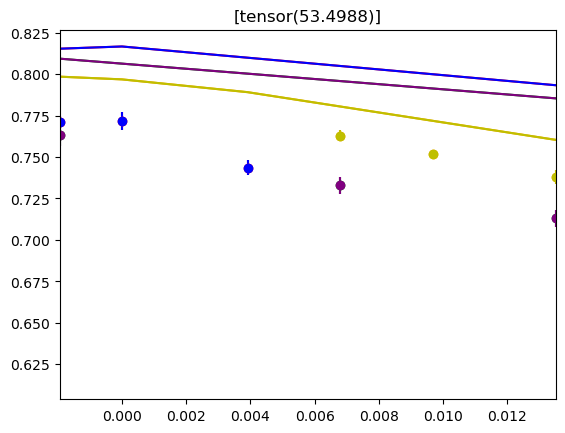

[[0.00478879 0.00469435 0.00731211 0.00731211 0.00478879 0.00469435]
 [0.00161927 0.00966438 0.00686984 0.00686984 0.00161927 0.00966438]
 [0.00264993 0.00400951 0.00667419 0.00667419 0.00264993 0.00400951]
 [0.00161927 0.00386796 0.00623812 0.00623812 0.00161927 0.00386796]
 [0.00314368 0.00443819 0.00607918 0.00607918 0.00314368 0.00443819]
 [0.00222611 0.00224198 0.008858   0.008858   0.00222611 0.00224198]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

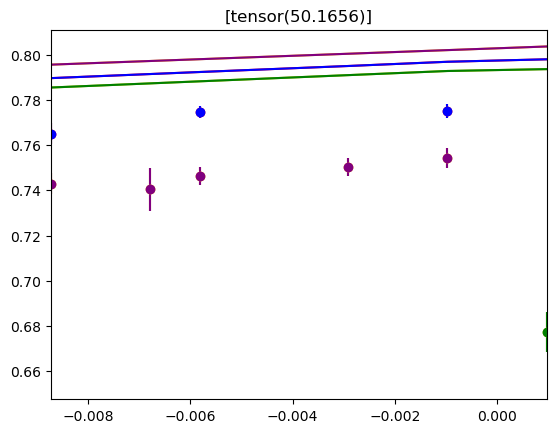

[[0.05812288 0.05812288 0.00974485 0.00974485 0.05812288 0.00974485]
 [0.05812288 0.05812288 0.001      0.001      0.05812288 0.001     ]
 [0.05812288 0.05812288 0.001      0.001      0.05812288 0.001     ]
 [0.05812288 0.05812288 0.05812288 0.05812288 0.05812288 0.05812288]
 [0.05812288 0.05812288 0.05812288 0.05812288 0.05812288 0.05812288]
 [0.05812288 0.05812288 0.001      0.001      0.05812288 0.001     ]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

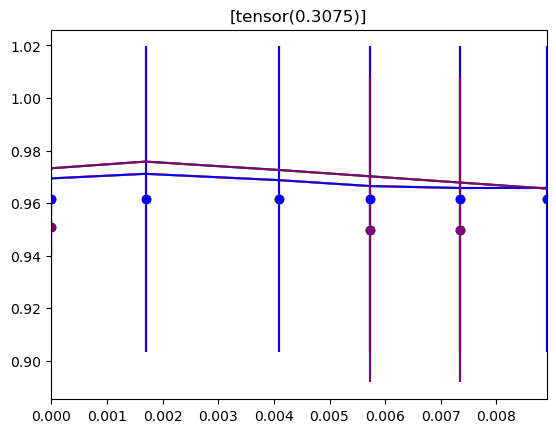

[[0.00809577 0.00411962 0.05812288 0.00809577 0.05812288 0.00411962]
 [0.0027764  0.01127475 0.00707573 0.0027764  0.00707573 0.01127475]
 [0.00397775 0.0074123  0.00379433 0.00397775 0.00379433 0.0074123 ]
 [0.01280952 0.0048197  0.00475673 0.01280952 0.00475673 0.0048197 ]
 [0.00967115 0.00956779 0.01375716 0.00967115 0.01375716 0.00956779]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

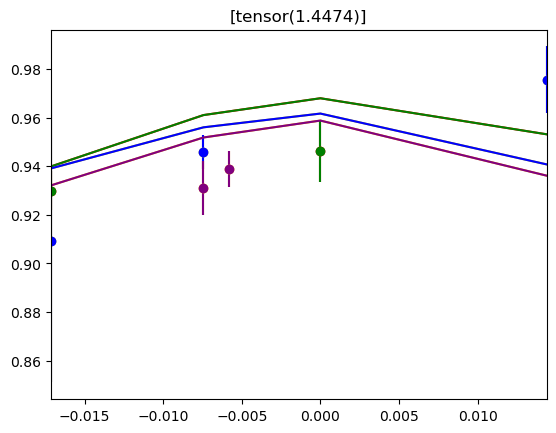

[[0.05812288 0.05812288 0.05812288 0.05812288 0.05812288 0.05812288]
 [0.00466282 0.00927199 0.00466282 0.00466282 0.00927199 0.00927199]
 [0.00852503 0.00463004 0.00852503 0.00852503 0.00463004 0.00463004]
 [0.0104428  0.01275702 0.0104428  0.0104428  0.01275702 0.01275702]
 [0.00851919 0.00493193 0.00851919 0.00851919 0.00493193 0.00493193]
 [0.00663715 0.01302406 0.00663715 0.00663715 0.01302406 0.01302406]
 [0.00540948 0.00725299 0.00540948 0.00540948 0.00725299 0.00725299]
 [0.00599289 0.0118972  0.00599289 0.00599289 0.0118972  0.0118972 ]
 [0.05812288 0.05812288 0.05812288 0.05812288 0.05812288 0.05812288]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

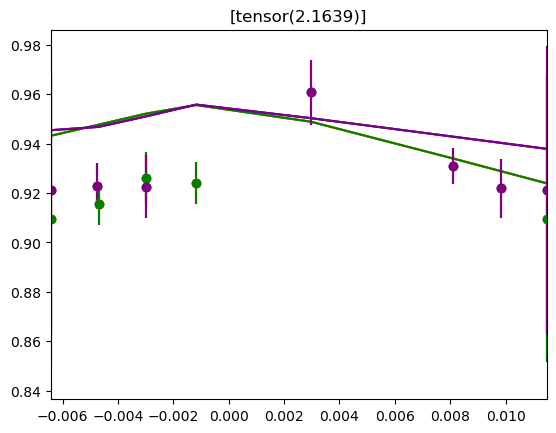

[[0.01276573 0.0175417  0.00974805 0.0175417  0.01276573 0.00974805]
 [0.0088756  0.00885216 0.00779192 0.00885216 0.0088756  0.00779192]
 [0.00618525 0.0117757  0.007802   0.0117757  0.00618525 0.007802  ]
 [0.01060984 0.0087544  0.01030693 0.0087544  0.01060984 0.01030693]
 [0.01273363 0.0151382  0.00676368 0.0151382  0.01273363 0.00676368]
 [0.00947965 0.00721067 0.00783829 0.00721067 0.00947965 0.00783829]
 [0.00686044 0.00816444 0.00802295 0.00816444 0.00686044 0.00802295]
 [0.01346553 0.00679924 0.01325806 0.00679924 0.01346553 0.01325806]
 [0.02225762 0.01148033 0.02026296 0.01148033 0.02225762 0.02026296]
 [0.02335912 0.01440399 0.03234304 0.01440399 0.02335912 0.03234304]
 [0.01262864 0.03020134 0.04858085 0.03020134 0.01262864 0.04858085]
 [0.01528111 0.03604884 0.05166137 0.03604884 0.01528111 0.05166137]
 [0.01401926 0.03790085 0.05255858 0.03790085 0.01401926 0.05255858]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

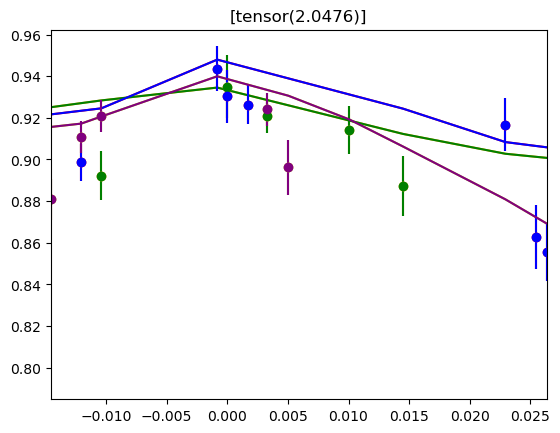

[[0.01322733 0.0139805  0.01324487 0.0139805  0.01322733 0.01324487]
 [0.002394   0.002394   0.00415517 0.002394   0.002394   0.00415517]
 [0.002394   0.002394   0.002394   0.002394   0.002394   0.002394  ]
 [0.002394   0.002394   0.002394   0.002394   0.002394   0.002394  ]
 [0.00533306 0.002394   0.002394   0.002394   0.00533306 0.002394  ]
 [0.0053335  0.00647017 0.00243704 0.00647017 0.0053335  0.00243704]
 [0.0038525  0.00398042 0.00417872 0.00398042 0.0038525  0.00417872]
 [0.01614847 0.00452433 0.00591103 0.00452433 0.01614847 0.00591103]
 [0.00676446 0.00338702 0.00262065 0.00338702 0.00676446 0.00262065]
 [0.00657479 0.00332303 0.00336138 0.00332303 0.00657479 0.00336138]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

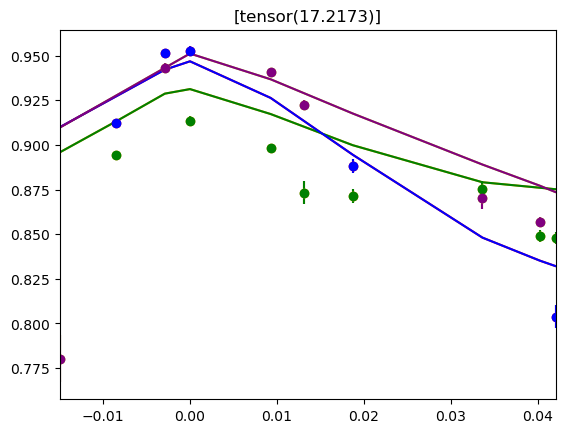

[[0.00693953 0.05812288 0.01340941 0.05812288 0.01340941 0.00693953]
 [0.00870369 0.00641996 0.01155507 0.00641996 0.01155507 0.00870369]
 [0.00589859 0.00822087 0.007689   0.00822087 0.007689   0.00589859]
 [0.01355395 0.00558543 0.0090034  0.00558543 0.0090034  0.01355395]
 [0.0152913  0.01160754 0.01441238 0.01160754 0.01441238 0.0152913 ]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

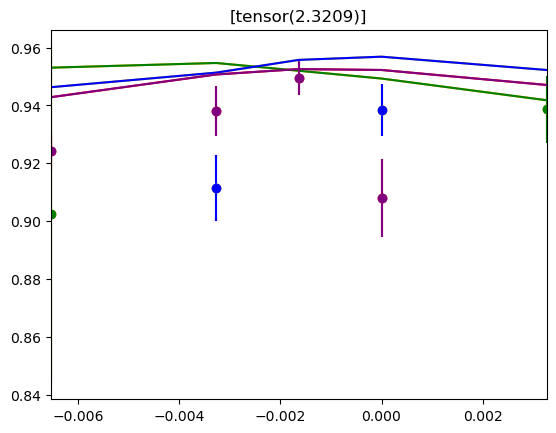

[[0.00867964 0.00867964 0.05812288 0.00867964 0.05812288 0.05812288]
 [0.01291328 0.01291328 0.01221124 0.01291328 0.01221124 0.01221124]
 [0.00602844 0.00602844 0.05812288 0.00602844 0.05812288 0.05812288]
 [0.00602845 0.00602845 0.01559424 0.00602845 0.01559424 0.01559424]
 [0.00602845 0.00602845 0.01262041 0.00602845 0.01262041 0.01262041]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

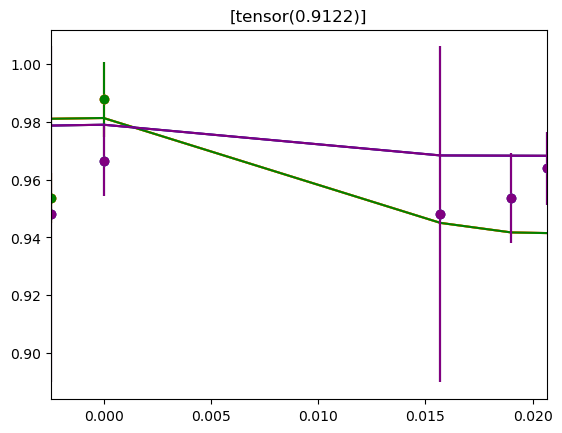

[[0.01827797 0.00482021 0.00482021 0.00244881 0.00244881 0.01827797]
 [0.01149663 0.00288945 0.00288945 0.0026462  0.0026462  0.01149663]
 [0.01004948 0.0039364  0.0039364  0.00430832 0.00430832 0.01004948]
 [0.00865484 0.0020924  0.0020924  0.00281714 0.00281714 0.00865484]
 [0.00626088 0.00483167 0.00483167 0.00208408 0.00208408 0.00626088]
 [0.00515934 0.00208408 0.00208408 0.00208408 0.00208408 0.00515934]
 [0.00254435 0.00336239 0.00336239 0.00420072 0.00420072 0.00254435]
 [0.00244605 0.00318029 0.00318029 0.00628033 0.00628033 0.00244605]
 [0.00380199 0.00301939 0.00301939 0.0144795  0.0144795  0.00380199]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

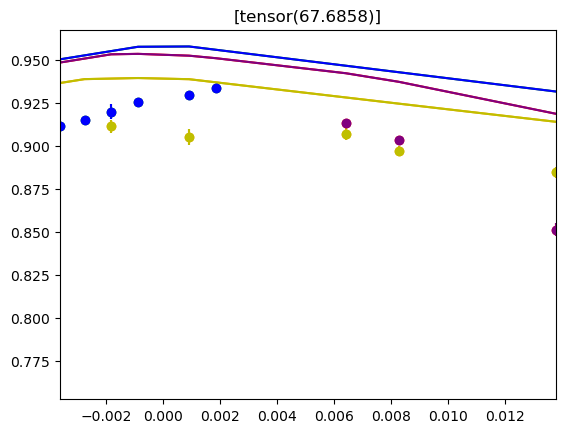

[[0.00495635 0.00924043 0.00924043 0.00495635 0.00924043 0.00495635]
 [0.00467658 0.01155855 0.01155855 0.00467658 0.01155855 0.00467658]
 [0.00916421 0.00474912 0.00474912 0.00916421 0.00474912 0.00916421]
 [0.00407991 0.01301076 0.01301076 0.00407991 0.01301076 0.00407991]
 [0.00405123 0.01354336 0.01354336 0.00405123 0.01354336 0.00405123]
 [0.00400283 0.05812288 0.05812288 0.00400283 0.05812288 0.00400283]
 [0.00728555 0.0047723  0.0047723  0.00728555 0.0047723  0.00728555]
 [0.0122213  0.00539877 0.00539877 0.0122213  0.00539877 0.0122213 ]
 [0.05812288 0.00547849 0.00547849 0.05812288 0.00547849 0.05812288]
 [0.05812288 0.05812288 0.05812288 0.05812288 0.05812288 0.05812288]
 [0.00950141 0.00585234 0.00585234 0.00950141 0.00585234 0.00950141]
 [0.05812288 0.00594604 0.00594604 0.05812288 0.00594604 0.05812288]
 [0.05812288 0.00710655 0.00710655 0.05812288 0.00710655 0.05812288]
 [0.05812288 0.05812288 0.05812288 0.05812288 0.05812288 0.05812288]
 [0.00711066 0.05812288 0.05812288

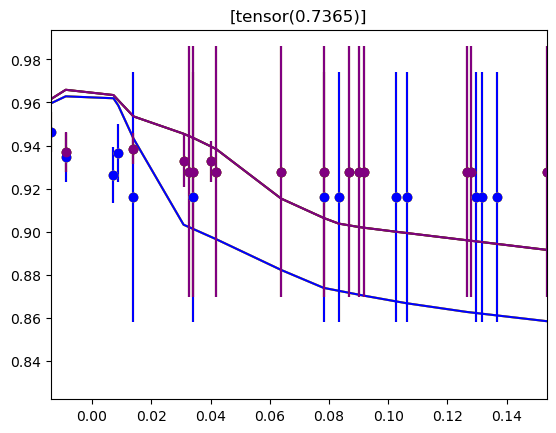

[[0.00584832 0.00510263 0.00584832 0.00510263 0.00575132 0.00575132]
 [0.00465961 0.0044928  0.00465961 0.0044928  0.00868939 0.00868939]
 [0.01050909 0.00460052 0.01050909 0.00460052 0.00552518 0.00552518]
 [0.00834614 0.00904697 0.00834614 0.00904697 0.00363748 0.00363748]
 [0.00469077 0.00503081 0.00469077 0.00503081 0.01430402 0.01430402]
 [0.01079346 0.00510315 0.01079346 0.00510315 0.00395394 0.00395394]
 [0.00488241 0.00511178 0.00488241 0.00511178 0.01252773 0.01252773]
 [0.00364205 0.01105946 0.00364205 0.01105946 0.00644213 0.00644213]
 [0.0036748  0.00810215 0.0036748  0.00810215 0.00484575 0.00484575]
 [0.01150874 0.0035288  0.01150874 0.0035288  0.00875853 0.00875853]
 [0.00524148 0.00497163 0.00524148 0.00497163 0.01194301 0.01194301]
 [0.01210946 0.00346195 0.01210946 0.00346195 0.01478145 0.01478145]
 [0.00359691 0.01158333 0.00359691 0.01158333 0.00753055 0.00753055]
 [0.00353172 0.01292058 0.00353172 0.01292058 0.00259857 0.00259857]
 [0.01067259 0.00468664 0.01067259

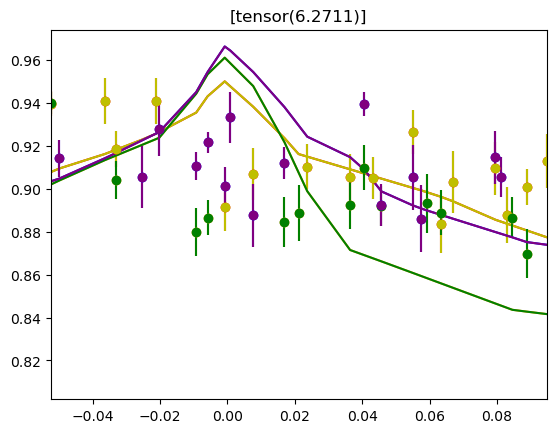

[[0.02140942 0.02140942 0.00681958 0.00681958 0.00681958 0.02140942]
 [0.01695196 0.01695196 0.00168982 0.00168982 0.00168982 0.01695196]
 [0.01646088 0.01646088 0.01053045 0.01053045 0.01053045 0.01646088]
 [0.01294121 0.01294121 0.00203046 0.00203046 0.00203046 0.01294121]
 [0.01227542 0.01227542 0.00211103 0.00211103 0.00211103 0.01227542]
 [0.01162382 0.01162382 0.00209116 0.00209116 0.00209116 0.01162382]
 [0.01093135 0.01093135 0.00207759 0.00207759 0.00207759 0.01093135]
 [0.01026028 0.01026028 0.00212337 0.00212337 0.00212337 0.01026028]
 [0.0096331  0.0096331  0.00264988 0.00264988 0.00264988 0.0096331 ]
 [0.00893708 0.00893708 0.00267542 0.00267542 0.00267542 0.00893708]
 [0.00778565 0.00778565 0.00361531 0.00361531 0.00361531 0.00778565]
 [0.00716589 0.00716589 0.00367045 0.00367045 0.00367045 0.00716589]
 [0.00663505 0.00663505 0.00460833 0.00460833 0.00460833 0.00663505]
 [0.00612409 0.00612409 0.00757379 0.00757379 0.00757379 0.00612409]
 [0.00681763 0.00681763 0.00216096

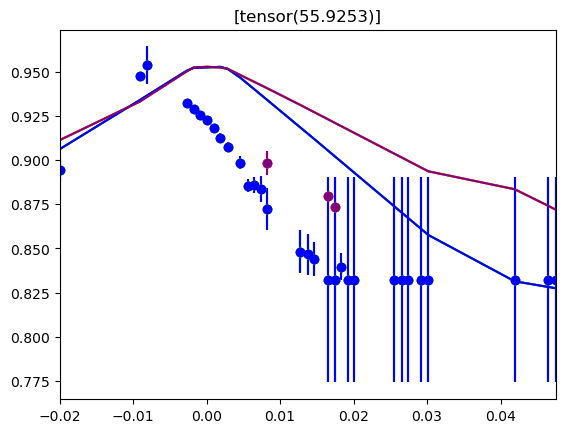

[[0.01222402 0.01440796 0.0070543  0.0070543  0.01222402 0.01440796]
 [0.00801023 0.01114554 0.0036463  0.0036463  0.00801023 0.01114554]
 [0.00206706 0.00253076 0.0019296  0.0019296  0.00206706 0.00253076]
 [0.00177292 0.0025405  0.00177292 0.00177292 0.00177292 0.0025405 ]
 [0.00202569 0.00177292 0.00177292 0.00177292 0.00202569 0.00177292]
 [0.0039277  0.00581652 0.00177292 0.00177292 0.0039277  0.00581652]
 [0.00270498 0.00215843 0.00223538 0.00223538 0.00270498 0.00215843]
 [0.00404038 0.00474612 0.00184977 0.00184977 0.00404038 0.00474612]
 [0.00347716 0.00435128 0.00295575 0.00295575 0.00347716 0.00435128]
 [0.00459016 0.00296679 0.00344605 0.00344605 0.00459016 0.00296679]
 [0.01379826 0.00322248 0.00253615 0.00253615 0.01379826 0.00322248]
 [0.00858557 0.00550132 0.00283226 0.00283226 0.00858557 0.00550132]
 [0.01743627 0.01277456 0.00561686 0.00561686 0.01743627 0.01277456]
 [0.02126961 0.00589304 0.00672529 0.00672529 0.02126961 0.00589304]
 [0.02679038 0.00619495 0.00626966

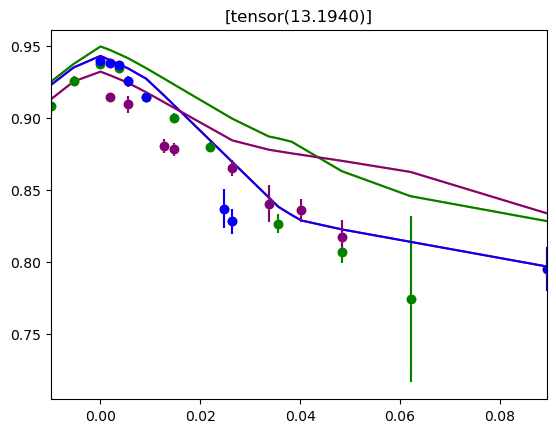

[[0.01307529 0.01307529 0.00540231 0.01307529 0.00540231 0.00540231]
 [0.00310947 0.00310947 0.01332365 0.00310947 0.01332365 0.01332365]
 [0.0115071  0.0115071  0.00298433 0.0115071  0.00298433 0.00298433]
 [0.00298433 0.00298433 0.01158015 0.00298433 0.01158015 0.01158015]
 [0.00298433 0.00298433 0.01307706 0.00298433 0.01307706 0.01307706]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00473709 0.00473709 0.00298433 0.00473709 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433 0.00298433 0.00298433 0.00298433]
 [0.00298433 0.00298433 0.00298433

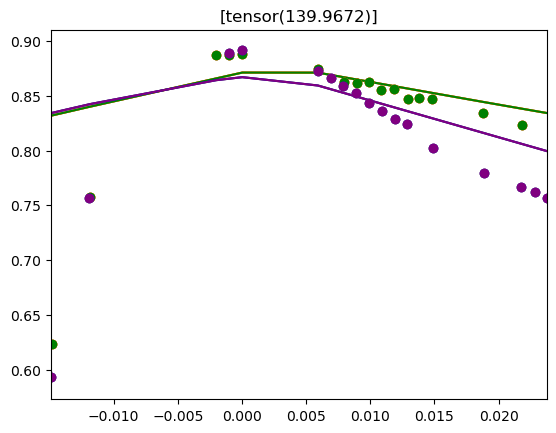

[[0.0044906  0.0044906  0.01177306 0.0044906  0.01177306 0.0044906 ]
 [0.0044906  0.00484552 0.0044906  0.0044906  0.0044906  0.00484552]
 [0.0044906  0.00537822 0.0044906  0.0044906  0.0044906  0.00537822]
 [0.0044906  0.0044906  0.0044906  0.0044906  0.0044906  0.0044906 ]
 [0.0044906  0.00776383 0.0044906  0.0044906  0.0044906  0.00776383]
 [0.0044906  0.00756469 0.01315958 0.0044906  0.01315958 0.00756469]
 [0.0044906  0.0044906  0.01291612 0.0044906  0.01291612 0.0044906 ]
 [0.00798776 0.0044906  0.00956807 0.00798776 0.00956807 0.0044906 ]
 [0.01086387 0.0044906  0.0044906  0.01086387 0.0044906  0.0044906 ]
 [0.0044906  0.02647832 0.0044906  0.0044906  0.0044906  0.02647832]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

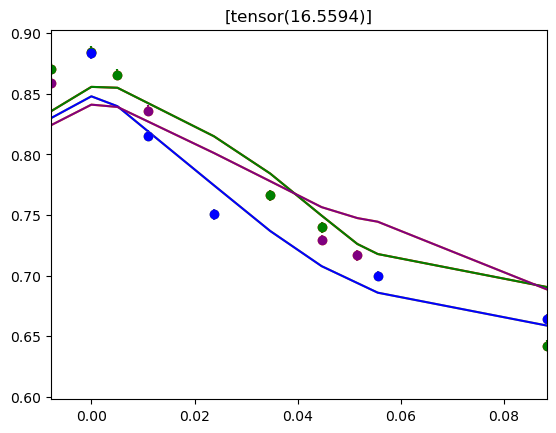

[[0.05812288 0.00850665 0.00850665 0.00850665 0.05812288 0.05812288]
 [0.05812288 0.00745805 0.00745805 0.00745805 0.05812288 0.05812288]
 [0.01202416 0.05812288 0.05812288 0.05812288 0.01202416 0.01202416]
 [0.00382477 0.0077082  0.0077082  0.0077082  0.00382477 0.00382477]
 [0.00792494 0.00818515 0.00818515 0.00818515 0.00792494 0.00792494]
 [0.00920537 0.01009744 0.01009744 0.01009744 0.00920537 0.00920537]
 [0.00762896 0.00261174 0.00261174 0.00261174 0.00762896 0.00762896]
 [0.00684852 0.0064154  0.0064154  0.0064154  0.00684852 0.00684852]
 [0.00238223 0.00612162 0.00612162 0.00612162 0.00238223 0.00238223]
 [0.00522076 0.0024295  0.0024295  0.0024295  0.00522076 0.00522076]
 [0.00685524 0.00530633 0.00530633 0.00530633 0.00685524 0.00685524]
 [0.00795519 0.00818131 0.00818131 0.00818131 0.00795519 0.00795519]
 [0.01194244 0.00277824 0.00277824 0.00277824 0.01194244 0.01194244]
 [0.00240656 0.01009787 0.01009787 0.01009787 0.00240656 0.00240656]
 [0.0075181  0.00879024 0.00879024

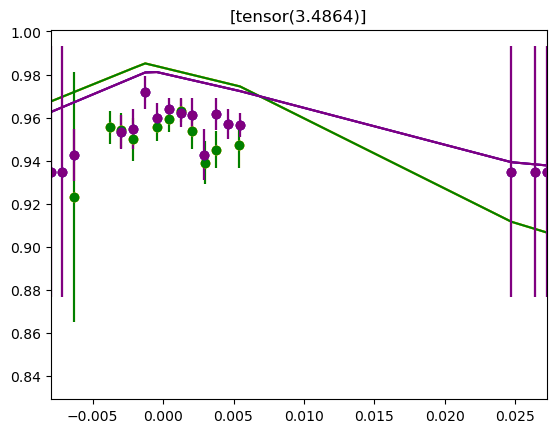

[[0.00867757 0.00867757 0.00892155 0.01060904 0.01060904 0.00892155]
 [0.0093385  0.0093385  0.01329213 0.00651444 0.00651444 0.01329213]
 [0.01231748 0.01231748 0.01164267 0.00871625 0.00871625 0.01164267]
 [0.01499639 0.01499639 0.01136559 0.00887583 0.00887583 0.01136559]
 [0.01469677 0.01469677 0.0117266  0.01098973 0.01098973 0.0117266 ]
 [0.0195294  0.0195294  0.01445183 0.0128962  0.0128962  0.01445183]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863 0.17436863 0.17436863 0.17436863]
 [0.17436863 0.17436863 0.17436863

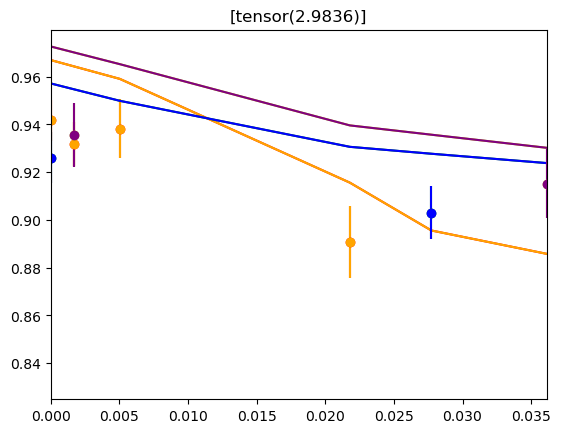

[[0.05812288 0.00837618 0.05812288 0.00837618 0.05812288 0.00837618]
 [0.00324281 0.00431997 0.00324281 0.00431997 0.00324281 0.00431997]
 [0.00427568 0.0032255  0.00427568 0.0032255  0.00427568 0.0032255 ]
 [0.00499738 0.00253305 0.00499738 0.00253305 0.00499738 0.00253305]
 [0.00283172 0.00546978 0.00283172 0.00546978 0.00283172 0.00546978]
 [0.00329205 0.00422292 0.00329205 0.00422292 0.00329205 0.00422292]
 [0.0074146  0.00287066 0.0074146  0.00287066 0.0074146  0.00287066]
 [0.00397874 0.00880479 0.00397874 0.00880479 0.00397874 0.00880479]
 [0.0156987  0.00372588 0.0156987  0.00372588 0.0156987  0.00372588]
 [0.00502974 0.0032193  0.00502974 0.0032193  0.00502974 0.0032193 ]
 [0.00304259 0.01434688 0.00304259 0.01434688 0.00304259 0.01434688]
 [0.00243104 0.00396503 0.00243104 0.00396503 0.00243104 0.00396503]
 [0.00438442 0.00253177 0.00438442 0.00253177 0.00438442 0.00253177]
 [0.00229548 0.00460016 0.00229548 0.00460016 0.00229548 0.00460016]
 [0.00505038 0.00228562 0.00505038

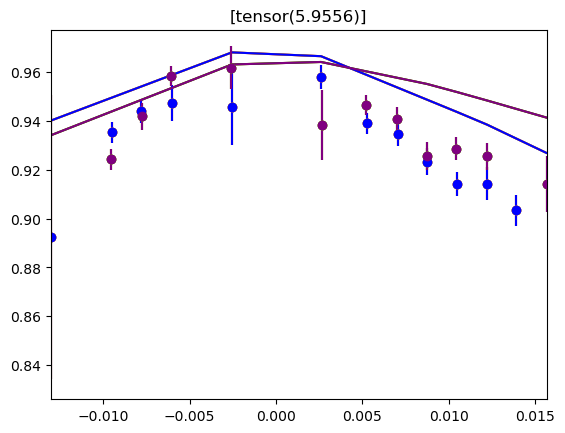

[[0.00999158 0.0107565  0.00999158 0.0107565  0.00572733 0.00572733]
 [0.00728174 0.00744948 0.00728174 0.00744948 0.00488383 0.00488383]
 [0.00251145 0.00185489 0.00251145 0.00185489 0.00662303 0.00662303]
 [0.00503607 0.00796379 0.00503607 0.00796379 0.00312329 0.00312329]
 [0.0023846  0.00807749 0.0023846  0.00807749 0.00312563 0.00312563]
 [0.00695537 0.00810872 0.00695537 0.00810872 0.00497863 0.00497863]
 [0.00372905 0.00733772 0.00372905 0.00733772 0.00262098 0.00262098]
 [0.00251825 0.01031451 0.00251825 0.01031451 0.00259575 0.00259575]
 [0.00295115 0.00750487 0.00295115 0.00750487 0.0055298  0.0055298 ]
 [0.00334245 0.0140029  0.00334245 0.0140029  0.00519385 0.00519385]
 [0.00332373 0.00938876 0.00332373 0.00938876 0.0070773  0.0070773 ]
 [0.00941732 0.01082869 0.00941732 0.01082869 0.00682887 0.00682887]
 [0.00389748 0.00880782 0.00389748 0.00880782 0.00909513 0.00909513]
 [0.01009063 0.01841228 0.01009063 0.01841228 0.01060916 0.01060916]
 [0.06169308 0.07350855 0.06169308

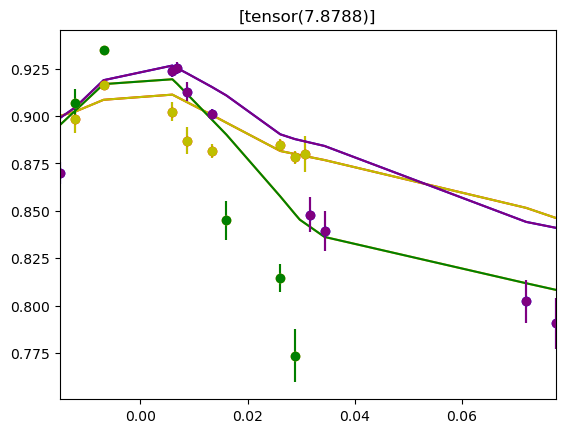

In [76]:
# plot decodings
import os
from survey_agnostic_sn_vae.preprocessing import prep_input
import matplotlib.pyplot as plt
import numpy as np
import torch
from survey_agnostic_sn_vae.raenn import *

LCFILE = 'superraenn/yse/lcs.npz'
OUTFILE = 'superraenn/yse/outputs/out.npz'
OUTDIR = 'superraenn/yse'
PREPFILE = 'superraenn/prep.npz'

sequence, outseq, loss_mask, ids, maxlen, nfilts = prep_input(
    LCFILE, load=True, outdir=OUTDIR, prep_file=PREPFILE
)
device = 'cpu'
model_fn = os.path.join(OUTDIR, "models/model.pt")
model = torch.load(model_fn).to(device)
model.device = device
model.maxlen = sequence.shape[1]

dataset = SNDataset(sequence[:,:,:-1], outseq, sequence[:,0,-1], loss_mask, device=device)
model.save_outputs(
    dataset, ids=ids, outdir=OUTDIR
)

out = np.load(OUTFILE, allow_pickle=True)
decodings = out['decodings']
z_means = out['z_means']
z_logvars = out['z_logvars']
ids2 = out['ids']

#assert(len(np.unique(ids)) == len(ids))
#assert(len(np.unique(ids2)) == len(ids2))
#assert np.all(ids == ids2)

for i in range(20):
    dec = decodings[i]
    seq = sequence[i]
    loss_mask_x = loss_mask[i]
    z_mean = z_means[i:i+1]
    z_logvar = z_logvars[i:i+1]
    
    t = seq[:,0]
    f = seq[:,1:7]
    ferr = seq[:,7:13]
    print(ferr)


    colors = ['r','orange','y','g','b','purple']
    for b in range(6):
        mask = loss_mask_x[:,b].astype(bool)
        plt.errorbar(t[~mask], f[:,b][~mask], yerr=ferr[:,b][~mask], fmt='o', c=colors[b])
        plt.plot(t, dec[:,b], c=colors[b])
        
    l = loss_function(
        torch.from_numpy(seq[np.newaxis,:,:]),
        torch.from_numpy(dec[np.newaxis,:,:]),
        torch.from_numpy(loss_mask_x[np.newaxis,:,:]).bool(), 6,
        z_mean, z_logvar, None, None,
    )
    plt.title(l)
    plt.xlim((np.min(t), np.max(t[t<0.2])))
    plt.show()